# Aula 02 Crash Course Pandas

## Objetivo:

Objetivo desta aula é apresentar transformações usuais em base de dados usando pandas. 

## Roteiro da aula:

- Relembrando a aula passada

    - Dúvidas
    
    - O que é um dataframe
    
    - Importação
    
    - Indetificação de tipos de variáveis
    
    - Seleção de colunas e filtros
    
    
- Dados Faltantes

    - O que fazer com NaNs
    

- Variáveis Categóricas

    - Categorical dtype

    - pd.Categorical
    
    - .describe() em colunas categóricas
    
    - Método mutador (em inglês, 'accessors')
    
    - One Hot Encoder Pandas - WARNING: Categoria não é um array numpy
    
    
- Metodologia Split-Apply-Combine

    - Grupos - Estrutura de MultiIndex
    
    - Usando apply em grupos
    
    - Função Aggregate
    
    - Apply em diferentes funções no grupo.
    
    - Função Transform
    
    - função filter
    
    - nlargest e nsmallest
    
    - Grupos por factor 

- Pipe: transformações em sequência

- Tabelas Pivot 



## Referências

- [Extensões do Jupyter: artigo no Medium](https://medium.com/@seymatas/5-jupyter-notebook-extensions-for-a-fully-organized-data-science-project-d764195f91be)

- [Instalando extensões do jupyter e possíveis erros - slackoverflow](https://stackoverflow.com/questions/37718907/variable-explorer-in-jupyter-notebook)

- [Pandas](https://pandas.pydata.org/)

- [Introdução em 10 minutos do Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

- [Documentação Pandas: Guia do usuário](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)

- [GitHub Cheat Sheet Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Here-Cheatsheet)

- [Numpy](https://numpy.org/)

- [Kaggle Titanic Data](https://www.kaggle.com/c/titanic/data)

- [Split-Apply-Combine Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

- [Colunas Categóricas](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)

- [Selecionando colunas pelo tipo de variável](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)


## Contato:

- E-mails:

    - walter@on.br
 
    - walter@neuralmed.ai
 
    - walterwsmf@outlook.com
 
- Redes Sociais:

    - [LinkedIn](https://www.linkedin.com/in/walterwsmf/)

    - [Twitter](https://twitter.com/walterwsmf)

1. Relembrando a aula passada:

In [1]:
%%time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

CPU times: user 673 ms, sys: 279 ms, total: 952 ms
Wall time: 3.2 s


In [2]:
# import dos dados
data = pd.read_csv('/Users/walter/Downloads/CrashCourse/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
data = data.astype({'Name':'string',
                    'Sex':'category',
                    'Survived':'category',
                    'Pclass': 'category',
                    'Embarked':'category',
                    'Cabin':'string',
                    'Parch':'category',
                    'SibSp':'category'}
                  )

data.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             string
Sex            category
Age             float64
SibSp          category
Parch          category
Ticket           object
Fare            float64
Cabin            string
Embarked       category
dtype: object

In [7]:
data.describe()

,PassengerId,Age,Fare
count,891.000000,714.000000,891.000000
mean,446.000000,29.699118,32.204208
std,257.353842,14.526497,49.693429
min,1.000000,0.420000,0.000000
25%,223.500000,20.125000,7.910400
50%,446.000000,28.000000,14.454200
75%,668.500000,38.000000,31.000000
max,891.000000,80.000000,512.329200


In [8]:
data._get_numeric_data()

,PassengerId,Age,Fare
0,1,22.0,7.2500
1,2,38.0,71.2833
2,3,26.0,7.9250
3,4,35.0,53.1000
4,5,35.0,8.0500
...,...,...,...
886,887,27.0,13.0000
887,888,19.0,30.0000
888,889,NaN,23.4500
889,890,26.0,30.0000


### Ontem usamos seleção de colunas para identificar correlação

O cuidado que devemos ter é transformar em coluna em categórica caso desejamos calcular algumas funções que dependam do numpy, pois o dtype 'category' não é um array.

In [10]:
# correlação somente funciona com colunas numéricas
data[["PassengerId","Survived","Pclass","Age","SibSp","Parch","Fare"]].corr() 

,PassengerId,Age,Fare
PassengerId,1.000000,0.036847,0.012658
Age,0.036847,1.000000,0.096067
Fare,0.012658,0.096067,1.000000


In [11]:
data[["PassengerId","Survived","Pclass","Age","SibSp","Parch","Fare"]].astype({
                    'Survived': 'float',
                    'Pclass': 'float',
                    }).corr() 

,PassengerId,Survived,Pclass,Age,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,0.096067
Fare,0.012658,0.257307,-0.549500,0.096067,1.000000


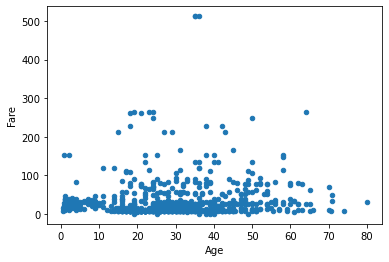

In [12]:
data.plot(x='Age',y='Fare',kind='scatter')

# Filtro por classe 

In [13]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
data['Pclass'].unique()

[3, 1, 2]
Categories (3, int64): [3, 1, 2]

Estatísticas da classe  3:        PassengerId         Age        Fare
count   491.000000  355.000000  491.000000
mean    439.154786   25.140620   13.675550
std     264.441453   12.495398   11.778142
min       1.000000    0.420000    0.000000
25%     200.000000   18.000000    7.750000
50%     432.000000   24.000000    8.050000
75%     666.500000   32.000000   15.500000
max     891.000000   74.000000   69.550000
Estatísticas da classe  1:        PassengerId         Age        Fare
count   216.000000  186.000000  216.000000
mean    461.597222   38.233441   84.154687
std     246.737616   14.802856   78.380373
min       2.000000    0.920000    0.000000
25%     270.750000   27.000000   30.923950
50%     472.000000   37.000000   60.287500
75%     670.500000   49.000000   93.500000
max     890.000000   80.000000  512.329200
Estatísticas da classe  2:        PassengerId         Age        Fare
count   184.000000  173.000000  184.000000
mean    445.956522   29.877630   20.662183
std     250.8521

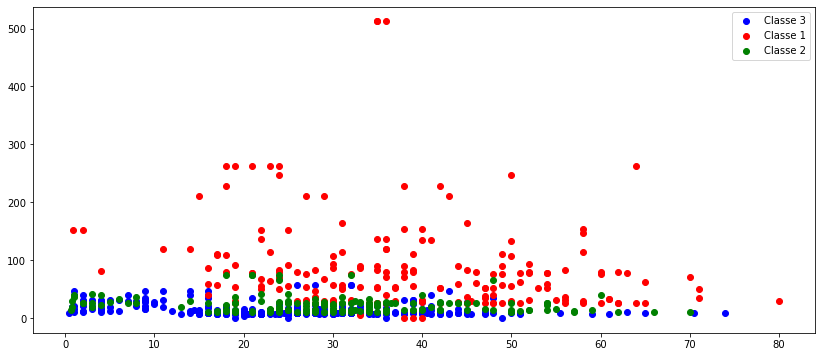

In [18]:
cor = ['red','green','blue']

plt.figure(figsize=(14,6))

for i in data['Pclass'].unique():
    
    plt.scatter(data[data['Pclass']==i]['Age'],
                data[data['Pclass']==i]['Fare'],
                color=cor[i-1],
                label=f"Classe {i}",
               )
    
    print(f"Estatísticas da classe  {i}: {data[data['Pclass']==i].describe()}")

plt.legend()

### - Faça o box plot equivalente aos dados filtrados por classe para coluna Fare.

### Dataset esta quebrado, será que desbalanço deve-se a isso?

- NO caso do dataset do Titanic Kaggle, vemos que existem dois arquivos, Train e Test. Vamos combiná-los.

In [19]:
train = pd.read_csv('/Users/walter/Downloads/CrashCourse/titanic/train.csv')
test = pd.read_csv('/Users/walter/Downloads/CrashCourse/titanic/test.csv')

In [20]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [21]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Queremos concatená-los:

```python
pd.concat
```

In [24]:
data = pd.concat([test,train],axis=0,sort=False)
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0


In [25]:
pd.concat([test,train],axis=1,sort=False)# concat com axis=1 incluir as colunas ao lado

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892.0,3.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,NaN,...,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,893.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,NaN,...,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,894.0,2.0,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,240276,9.6875,NaN,...,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,895.0,3.0,"Wirz, Mr. Albert",male,27.0,0.0,0.0,315154,8.6625,NaN,...,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,896.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,3101298,12.2875,NaN,...,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Como concat não reinicia o Index, devemos fazer isso manualmente:

In [26]:
data.reset_index(drop=True,inplace=True)

In [27]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


In [28]:
data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
1304,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0.0
1305,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,1.0
1306,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,0.0
1307,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1.0
1308,891,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0.0


In [29]:
data.shape

(1309, 12)

In [30]:
del train, test # deletando dataframes (ou outras variáveis)

É possível somente deletar uma coluna do dataframe, por exemplo:

```python
del data['Age']
```

deletaria a coluna 'Age'.

In [31]:
data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived       float64
dtype: object

In [32]:
data = data.astype({'Name':'string',
                    'Sex':'category',
                    'Survived':'category',
                    'Pclass': 'category',
                    'Embarked':'category',
                    'Cabin':'string',
                    'Parch':'category',
                    'SibSp':'category'})

data.dtypes

PassengerId       int64
Pclass         category
Name             string
Sex            category
Age             float64
SibSp          category
Parch          category
Ticket           object
Fare            float64
Cabin            string
Embarked       category
Survived       category
dtype: object

Estatísticas para classe 3:        PassengerId         Age        Fare
count   709.000000  501.000000  708.000000
mean    640.558533   24.816367   13.302889
std     379.887782   11.958202   11.494358
min       1.000000    0.170000    0.000000
25%     302.000000   18.000000    7.750000
50%     644.000000   24.000000    8.050000
75%     971.000000   32.000000   15.245800
max    1309.000000   74.000000   69.550000

Estatísticas para classe 2:        PassengerId         Age        Fare
count   277.000000  261.000000  277.000000
mean    671.566787   29.506705   21.179196
std     383.707495   13.638627   13.607122
min      10.000000    0.670000    0.000000
25%     341.000000   22.000000   13.000000
50%     671.000000   29.000000   15.045800
75%    1035.000000   36.000000   26.000000
max    1298.000000   70.000000   73.500000

Estatísticas para classe 1:        PassengerId         Age        Fare
count    323.00000  284.000000  323.000000
mean     672.49226   39.159930   87.508992
std      36

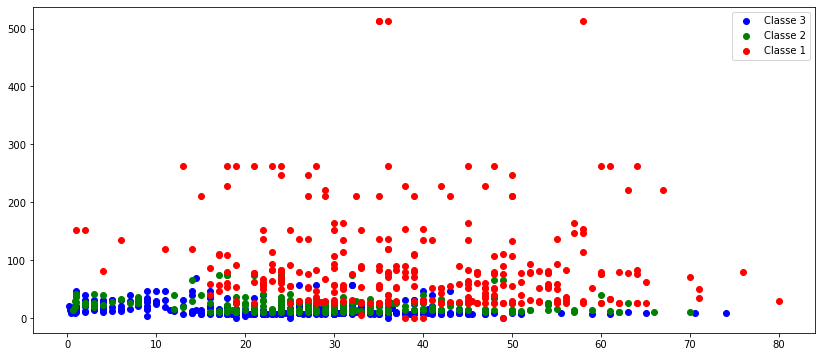

In [33]:
cor = ['red','green','blue']
plt.figure(figsize=(14,6))
for i in data['Pclass'].unique():
    
    plt.scatter(data[data['Pclass']==i]['Age'],
                data[data['Pclass']==i]['Fare'],
                color=cor[i-1],
                label=f"Classe {i}",
               )
    
    print(f"Estatísticas para classe {i}: {data[data['Pclass']==i].describe()}\n")

plt.legend()

# Podemos trabalhar nos dados faltantes:

1. Substituindo por valor

2. Removendo-os

In [35]:
data.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived        418
dtype: int64

## Mas quando é cabível remoção ou a substituição?

- Survived: provavelmente é devido o caso dos dados serem provenientes de uma competição, que deseja prever essa condição  ( e por isto não é tabelada a resposta final). Dados faltantes nessa coluna devem-se a natureza de origem/aquisição

- Cabin: é a maioria dos dados faltantes. Existe [debate sobre o quão relevante é a posição de cabine a sobrevivência durante o acidente do Titanic](https://www.encyclopedia-titanica.org/community/threads/which-passengers-most-likely-died-in-their-cabins.2296/) e caso tenham interesse, clique no link. Mas devido a terem muitos dados faltantes (muito mais do que metado dos casos), podemos dizer que a informação que possamos tirar deve ser pouca.

- Age: São poucos dados, mas não é uma variável categórica. Talvez possamos estimar os dados por correlação com outras colunas, mas somente pela análise atual, não é clara.

In [38]:
help(data['Age'].fillna)

Help on method fillna in module pandas.core.series:

fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None) -> Union[ForwardRef('Series'), NoneType] method of pandas.core.series.Series instance
    Fill NA/NaN values using the specified method.
    
    Parameters
    ----------
    value : scalar, dict, Series, or DataFrame
        Value to use to fill holes (e.g. 0), alternately a
        dict/Series/DataFrame of values specifying which value to use for
        each index (for a Series) or column (for a DataFrame).  Values not
        in the dict/Series/DataFrame will not be filled. This value cannot
        be a list.
    method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
        Method to use for filling holes in reindexed Series
        pad / ffill: propagate last valid observation forward to next valid
        backfill / bfill: use next valid observation to fill gap.
    axis : {0 or 'index'}
        Axis along which to fill missing v

In [37]:
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,<NA>,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,<NA>,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,<NA>,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,<NA>,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,<NA>,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,<NA>,S,0.0
1305,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
1306,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,<NA>,S,0.0
1307,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0


# Colunas Categóricas

- Podemos selecionar qualquer grupo de colunas pelo tipo dos elementos pela rotina **.select_dtypes** 

In [40]:
help(data.select_dtypes)

Help on method select_dtypes in module pandas.core.frame:

select_dtypes(include=None, exclude=None) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Return a subset of the DataFrame's columns based on the column dtypes.
    
    Parameters
    ----------
    include, exclude : scalar or list-like
        A selection of dtypes or strings to be included/excluded. At least
        one of these parameters must be supplied.
    
    Returns
    -------
    DataFrame
        The subset of the frame including the dtypes in ``include`` and
        excluding the dtypes in ``exclude``.
    
    Raises
    ------
    ValueError
        * If both of ``include`` and ``exclude`` are empty
        * If ``include`` and ``exclude`` have overlapping elements
        * If any kind of string dtype is passed in.
    
    Notes
    -----
    * To select all *numeric* types, use ``np.number`` or ``'number'``
    * To select strings you must use the ``object`` dtype, but note that
      this

In [41]:
data.select_dtypes(include=['category'])

,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,3,male,0,0,Q,NaN
1,3,female,1,0,S,NaN
2,2,male,0,0,Q,NaN
3,3,male,0,0,S,NaN
4,3,female,1,1,S,NaN
...,...,...,...,...,...,...
1304,2,male,0,0,S,0.0
1305,1,female,0,0,S,1.0
1306,3,female,1,2,S,0.0
1307,1,male,0,0,C,1.0


In [43]:
data.select_dtypes(exclude=['category','string'])

,PassengerId,Age,Ticket,Fare
0,892,34.5,330911,7.8292
1,893,47.0,363272,7.0000
2,894,62.0,240276,9.6875
3,895,27.0,315154,8.6625
4,896,22.0,3101298,12.2875
...,...,...,...,...
1304,887,27.0,211536,13.0000
1305,888,19.0,112053,30.0000
1306,889,NaN,W./C. 6607,23.4500
1307,890,26.0,111369,30.0000


Uma coluna não categorica pode ser transformada pelo astype, como fizemos, ou forçando a classe categorical:

In [44]:
pd.Categorical(data['Sex'].astype('string'))

[male, female, male, male, female, ..., male, female, female, male, male]
Length: 1309
Categories (2, object): [female, male]

In [45]:
help(pd.Categorical)

Help on class Categorical in module pandas.core.arrays.categorical:

class Categorical(pandas.core.arrays.base.ExtensionArray, pandas.core.base.PandasObject)
 |  Categorical(values, categories=None, ordered=None, dtype=None, fastpath=False)
 |  
 |  Represent a categorical variable in classic R / S-plus fashion.
 |  
 |  `Categoricals` can only take on only a limited, and usually fixed, number
 |  of possible values (`categories`). In contrast to statistical categorical
 |  variables, a `Categorical` might have an order, but numerical operations
 |  (additions, divisions, ...) are not possible.
 |  
 |  All values of the `Categorical` are either in `categories` or `np.nan`.
 |  Assigning values outside of `categories` will raise a `ValueError`. Order
 |  is defined by the order of the `categories`, not lexical order of the
 |  values.
 |  
 |  Parameters
 |  ----------
 |  values : list-like
 |      The values of the categorical. If categories are given, values not in
 |      categorie

### .describe em Categorias

Para colunas categóricas, o **.describe** retorna quantos únicos existe, a classe com maior quantidade (top) e a quantidade amostral na classe com maior quantidade (freq).

In [46]:
data.select_dtypes(include=['category']).describe()

,Pclass,Sex,SibSp,Parch,Embarked,Survived
count,1309,1309,1309,1309,1307,891.0
unique,3,2,7,8,3,2.0
top,3,male,0,0,S,0.0
freq,709,843,891,1002,914,549.0


In [48]:
filtro = data['Sex'] == 'male'
filtro.sum()

843

### Método Mutador 

Método Mutador é o termo a um método que controla alterações.

Pode ser usando no Pandas para identificar, como um filtro, condições.


Mais usados são:

- .str : para colunas categoricas incialmente com string

- .dt : colunas categóricas de tempo 

In [49]:
data['Sex'].str.contains("f") # sendo categoria um string incialmente, podemos usar condições de regex

0       False
1        True
2       False
3       False
4        True
        ...  
1304    False
1305     True
1306     True
1307    False
1308    False
Name: Sex, Length: 1309, dtype: bool

In [50]:
data[data['Sex'].str.contains("f")]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,<NA>,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,<NA>,S,NaN
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,<NA>,Q,NaN
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,<NA>,C,NaN
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,881,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,<NA>,S,1.0
1300,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,<NA>,S,0.0
1303,886,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,<NA>,Q,0.0
1305,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0


In [51]:
data[~(data['Sex'].str.contains("f"))]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,<NA>,Q,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,<NA>,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,<NA>,S,NaN
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,<NA>,S,NaN
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,<NA>,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1301,884,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,<NA>,S,0.0
1302,885,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,<NA>,S,0.0
1304,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,<NA>,S,0.0
1307,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0


Se usamos o mutador incorreto, o resultado é um erro:

In [52]:
data['Sex'].dt

AttributeError: Can only use .dt accessor with datetimelike values

In [54]:
try:
    z = data['Sex'].dt
except:
    z = 0
    
z

0

In [55]:
try:
    z = data['Sex'].dt
except:
    pass

### One Hot Encoder Pandas Categorical

Tem vezes que queremos transformar a coluna categórica em uma matriz de zero e um, i.e., transformá-la em variáveis dummies.

O pandas pode processar a coluna categorica de forma natural:

```python
pd.get_dummies
```

In [56]:
data['Sex']

0         male
1       female
2         male
3         male
4       female
         ...  
1304      male
1305    female
1306    female
1307      male
1308      male
Name: Sex, Length: 1309, dtype: category
Categories (2, object): [female, male]

In [57]:
pd.get_dummies(data['Sex'])

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
1304,0,1
1305,1,0
1306,1,0
1307,0,1


### Em todas as colunas categóricas:

In [58]:
pd.get_dummies(data.select_dtypes(include=['category']))

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_C,Embarked_Q,Embarked_S,Survived_0.0,Survived_1.0
0,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1305,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1306,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1307,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


# Split-Apply-Combine


A metodologia split-apply-combine possui a ideia de quebrar o dataset em grupos menores, com suas afinidades, para processá-los (apply/transform) e depois combinar todo resultado final.

In [59]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,<NA>,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,<NA>,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,<NA>,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,<NA>,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,<NA>,S,NaN


Podemos imaginar agrupar pela classe e por intervalo de idade talvez.

O primeiro grupo, por sexo, da-se da seguinte forma:

In [60]:
data.groupby(by=['Sex'])

Cria um objeto pandas.core.groupby

In [61]:
g = data.groupby(by=['Sex'])
g,type(g)

(<pandas.core.groupby.generic.DataFrameGroupBy object at 0x7ffb5ce47730>,
 pandas.core.groupby.generic.DataFrameGroupBy)

In [62]:
g.count() # grupo cria sub-níveis de indexação para calculo, por exemplo, contagem de elementos.

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
Sex,,,,,,,,,,,
female,466,466,466,388,466,466,466,466,141,464,314
male,843,843,843,658,843,843,843,842,154,843,577


In [63]:
g.apply(len) #podemos aplicar uma funcao diretamente nos novos indices do grupo

Sex
female    466
male      843
dtype: int64

In [64]:
g['Age'].apply(np.array) #ou em coluna do grupo, neste cenário, o resultado é uma Série.

Sex
female    [47.0, 22.0, 30.0, 18.0, 23.0, 47.0, 24.0, 27....
male      [34.5, 62.0, 27.0, 14.0, 26.0, 21.0, nan, 46.0...
Name: Age, dtype: object

In [65]:
g['Age'].apply(np.array).reset_index()

,Sex,Age
0,female,"[47.0, 22.0, 30.0, 18.0, 23.0, 47.0, 24.0, 27...."
1,male,"[34.5, 62.0, 27.0, 14.0, 26.0, 21.0, nan, 46.0..."


Outras formas de aplicar rotina é especuficar por exemplo as colunas:

In [66]:
def func(group):
    return {
        'Age media': group['Age'].mean(),
        'Age std':group['Age'].std(),
        'Age count':group['Age'].count(),
           }

In [69]:
g.apply(func)

Sex
female    {'Age media': 28.68708762886598, 'Age std': 14...
male      {'Age media': 30.58522796352583, 'Age std': 14...
dtype: object

In [70]:
g.apply(func).apply(pd.Series)

,Age media,Age std,Age count
Sex,,,
female,28.687088,14.576962,388.0
male,30.585228,14.280581,658.0


In [71]:
g.describe()

PassengerId                                                            \
             count        mean         std  min    25%    50%    75%     max   
Sex                                                                            
female       466.0  648.186695  383.371009  2.0  317.5  635.5  981.5  1306.0   
male         843.0  658.766311  375.205282  1.0  339.5  665.0  982.0  1309.0   

          Age             ...               Fare                              \
        count       mean  ...   75%   max  count       mean        std   min   
Sex                       ...                                                  
female  388.0  28.687088  ...  38.0  76.0  466.0  46.198097  63.292599  6.75   
male    658.0  30.585228  ...  39.0  80.0  842.0  26.154601  42.486877  0.00   

                                                 
              25%      50%        75%       max  
Sex                                              
female  10.504175  23.0000  55.331275  512.3292  
male     7.876050  11.8875  26.550000  512.3292  

[2 rows x 24 columns]

In [72]:
g.first() #primeiros dos grupos

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
Sex,,,,,,,,,,,
female,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,B45,S,1.0
male,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,A21,Q,0.0


In [73]:
g.last() #últimos listados em cada grupo

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
Sex,,,,,,,,,,,
female,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",19.0,1,2,W./C. 6607,23.45,B42,S,0.0
male,891,3,"Dooley, Mr. Patrick",32.0,0,0,370376,7.75,C148,Q,0.0


In [74]:
g.ngroups #quantidade de grupos. Por que? porque podemos aumentar nivel de sub-indexacao

2

# Trabalhando sem NaNs numa coluna específica

In [75]:
df = data.dropna(subset=['Survived']).copy()
df 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
418,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,<NA>,S,0.0
419,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
420,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,<NA>,S,1.0
421,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
422,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,<NA>,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,<NA>,S,0.0
1305,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
1306,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,<NA>,S,0.0
1307,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0


In [76]:
df['Survived'] = df['Survived'].fillna(value=0).astype(bool)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
418,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,<NA>,S,False
419,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
420,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,<NA>,S,True
421,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
422,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,<NA>,S,False


In [77]:
g = df.groupby(by=['Sex','Pclass'])

In [78]:
g.ngroups

6

In [79]:
g.first()

PassengerId                                               Name  \
Sex    Pclass                                                                   
female 1                 2  Cumings, Mrs. John Bradley (Florence Briggs Th...   
       2                10                Nasser, Mrs. Nicholas (Adele Achem)   
       3                 3                             Heikkinen, Miss. Laina   
male   1                 7                            McCarthy, Mr. Timothy J   
       2                18                       Williams, Mr. Charles Eugene   
       3                 1                            Braund, Mr. Owen Harris   

                Age SibSp Parch            Ticket     Fare  Cabin Embarked  \
Sex    Pclass                                                                
female 1       38.0     1     0          PC 17599  71.2833    C85        C   
       2       14.0     1     0            237736  30.0708    F33        C   
       3       26.0     0     0  STON/O2. 3101282   7.9250     G6        S   
male   1       54.0     0     0             17463  51.8625    E46        S   
       2       35.0     0     0            244373  13.0000    D56        S   
       3       22.0     1     0         A/5 21171   7.2500  F G73        S   

               Survived  
Sex    Pclass            
female 1           True  
       2           True  
       3           True  
male   1          False  
       2           True  
       3          False

In [80]:
g.count()

PassengerId  Name  Age  SibSp  Parch  Ticket  Fare  Cabin  \
Sex    Pclass                                                              
female 1                94    94   85     94     94      94    94     81   
       2                76    76   74     76     76      76    76     10   
       3               144   144  102    144    144     144   144      6   
male   1               122   122  101    122    122     122   122     95   
       2               108   108   99    108    108     108   108      6   
       3               347   347  253    347    347     347   347      6   

               Embarked  Survived  
Sex    Pclass                      
female 1             92        94  
       2             76        76  
       3            144       144  
male   1            122       122  
       2            108       108  
       3            347       347

In [81]:
df['Survived'].shape,df['Survived'].shape[0]

((891,), 891)

In [82]:
g.apply(lambda k: k['Survived'].sum()/df['Survived'].shape[0])

Sex     Pclass
female  1         0.102132
        2         0.078563
        3         0.080808
male    1         0.050505
        2         0.019080
        3         0.052750
dtype: float64

In [107]:
s = g.apply(lambda k: k['Survived'].sum()/df['Survived'].shape[0]).reset_index()
s

,Sex,Pclass,0
0,female,1,0.102132
1,female,2,0.078563
2,female,3,0.080808
3,male,1,0.050505
4,male,2,0.019080
5,male,3,0.052750


In [113]:
#s.loc[0,0]

In [84]:
s = s.rename(columns={0:'PercentageSurvived'},)
s

,Sex,Pclass,PercentageSurvived
0,female,1,0.102132
1,female,2,0.078563
2,female,3,0.080808
3,male,1,0.050505
4,male,2,0.019080
5,male,3,0.052750


In [85]:
s.sort_values(by=['PercentageSurvived',],ascending=False)

,Sex,Pclass,PercentageSurvived
0,female,1,0.102132
2,female,3,0.080808
1,female,2,0.078563
5,male,3,0.052750
3,male,1,0.050505
4,male,2,0.019080


### Podemos selecionar somente um grupo, sabendo as características do multiIndex esperado:

In [86]:
g.get_group(('female',1))

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
419,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,True
421,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,True
429,12,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,S,True
449,32,"Spencer, Mrs. William Augustus (Marie Eugenie)",NaN,1,0,PC 17569,146.5208,B78,C,True
470,53,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",49.0,1,0,PC 17572,76.7292,D33,C,True
...,...,...,...,...,...,...,...,...,...,...
1274,857,"Wick, Mrs. George Dennick (Mary Hitchcock)",45.0,1,1,36928,164.8667,<NA>,S,True
1280,863,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",48.0,0,0,17466,25.9292,D17,S,True
1289,872,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",47.0,1,1,11751,52.5542,D35,S,True
1297,880,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",56.0,0,1,11767,83.1583,C50,C,True


### Rotinas Aggregate

Vamos considerar que não queremos incluir as colunas de grupo como indices, podemos usar o termo **as_index=False**, dentro do **groupby**

In [95]:
g = df.groupby(by=['Sex','Pclass'],as_index=False)
# g = df.groupby(by=['Sex','Pclass'],as_index=True)

In [96]:
g

In [97]:
g.sum()

,Sex,Pclass,PassengerId,Age,Fare,Survived
0,female,1,44106,2942.00,9975.8250,91.0
1,female,2,33676,2125.50,1669.7292,70.0
2,female,3,57561,2218.50,2321.1086,72.0
3,male,1,55599,4169.42,8201.5875,45.0
4,male,2,48380,3043.33,2132.1125,17.0
5,male,3,158064,6706.42,4393.5865,47.0


In [98]:
g.aggregate(np.sum)

,Sex,Pclass,PassengerId,Age,Fare,Survived
0,female,1,44106,2942.00,9975.8250,91.0
1,female,2,33676,2125.50,1669.7292,70.0
2,female,3,57561,2218.50,2321.1086,72.0
3,male,1,55599,4169.42,8201.5875,45.0
4,male,2,48380,3043.33,2132.1125,17.0
5,male,3,158064,6706.42,4393.5865,47.0


### .describe me grupos permite obter estat'siticas por cada grupo definido:

In [99]:
g = df.groupby(by=['Sex','Pclass'])

In [100]:
g.describe()

PassengerId                                               \
                    count        mean         std   min     25%    50%   
Sex    Pclass                                                            
female 1             94.0  469.212766  247.476723   2.0  293.50  447.0   
       2             76.0  443.105263  243.627288  10.0  269.75  439.5   
       3            144.0  399.729167  267.232416   3.0  165.25  376.0   
male   1            122.0  455.729508  247.026449   7.0  255.50  480.5   
       2            108.0  447.962963  256.922546  18.0  225.75  416.5   
       3            347.0  455.515850  261.921251   1.0  209.50  466.0   

                                Age             ...                Fare  \
                  75%    max  count       mean  ...    75%   max  count   
Sex    Pclass                                   ...                       
female 1       698.25  888.0   85.0  34.611765  ...  44.00  63.0   94.0   
       2       616.75  881.0   74.0  28.722973  ...  36.00  57.0   76.0   
       3       636.00  889.0  102.0  21.750000  ...  29.75  63.0  144.0   
male   1       660.75  890.0  101.0  41.281386  ...  51.00  80.0  122.0   
       2       677.50  887.0   99.0  30.740707  ...  36.75  70.0  108.0   
       3       687.50  891.0  253.0  26.507589  ...  33.00  74.0  347.0   

                                                                               \
                     mean        std      min       25%       50%         75%   
Sex    Pclass                                                                   
female 1       106.125798  74.259988  25.9292  57.24480  82.66455  134.500000   
       2        21.970121  10.891796  10.5000  13.00000  22.00000   26.062500   
       3        16.118810  11.690314   6.7500   7.85420  12.47500   20.221875   
male   1        67.226127  77.548021   0.0000  27.72810  41.26250   78.459375   
       2        19.741782  14.922235   0.0000  12.33125  13.00000   26.000000   
       3        12.661633  11.681696   0.0000   7.75000   7.92500   10.008300   

                         
                    max  
Sex    Pclass            
female 1       512.3292  
       2        65.0000  
       3        69.5500  
male   1       512.3292  
       2        73.5000  
       3        69.5500  

[6 rows x 24 columns]

Na prática, faz agregação das funções estaísticas por lista:

In [101]:
g['Age'].agg([np.sum, np.mean, np.std])

sum       mean        std
Sex    Pclass                               
female 1       2942.00  34.611765  13.612052
       2       2125.50  28.722973  12.872702
       3       2218.50  21.750000  12.729964
male   1       4169.42  41.281386  15.139570
       2       3043.33  30.740707  14.793894
       3       6706.42  26.507589  12.159514

In [102]:
g['Age'].agg(
    min_Age=pd.NamedAgg(column='min Age', aggfunc='min'),
    max_Age=pd.NamedAgg(column='max Age', aggfunc='max'),
    average_Age=pd.NamedAgg(column='mean Age', aggfunc=np.mean),
)

min_Age  max_Age  average_Age
Sex    Pclass                               
female 1          2.00     63.0    34.611765
       2          2.00     57.0    28.722973
       3          0.75     63.0    21.750000
male   1          0.92     80.0    41.281386
       2          0.67     70.0    30.740707
       3          0.42     74.0    26.507589

Podemos aplicar as funções no grupo também por colunas em dicionário:

In [103]:
g.agg(
    {'Age': np.mean, #na coluna Age aplique a media
     'Fare': lambda x: np.std(x), #na coluna Fare aplique a funcao lambda x
      })

Age       Fare
Sex    Pclass                      
female 1       34.611765  73.863932
       2       28.722973  10.819902
       3       21.750000  11.649652
male   1       41.281386  77.229547
       2       30.740707  14.852990
       3       26.507589  11.664851

In [104]:
help(np.std)

Help on function std in module numpy:

std(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>)
    Compute the standard deviation along the specified axis.
    
    Returns the standard deviation, a measure of the spread of a distribution,
    of the array elements. The standard deviation is computed for the
    flattened array by default, otherwise over the specified axis.
    
    Parameters
    ----------
    a : array_like
        Calculate the standard deviation of these values.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the standard deviation is computed. The
        default is to compute the standard deviation of the flattened array.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a standard deviation is performed over
        multiple axes, instead of a single axis or all the axes as before.
    dtype : dtype, optional
        Type to use in computing the standard deviation. For arrays of
       

### Um grupo reage semelhane ao **zip** em python:

In [114]:
for i,j in zip(range(3),['A','B','C']):
    print(i,j)

0 A
1 B
2 C


In [115]:
for name, group in g:
    print(name)
    print(group)

('female', 1)
      PassengerId Pclass                                               Name  \
419             2      1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
421             4      1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
429            12      1                           Bonnell, Miss. Elizabeth   
449            32      1     Spencer, Mrs. William Augustus (Marie Eugenie)   
470            53      1           Harper, Mrs. Henry Sleeper (Myna Haxtun)   
...           ...    ...                                                ...   
1274          857      1         Wick, Mrs. George Dennick (Mary Hitchcock)   
1280          863      1  Swift, Mrs. Frederick Joel (Margaret Welles Ba...   
1289          872      1   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)   
1297          880      1      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)   
1305          888      1                       Graham, Miss. Margaret Edith   

         Sex   Age SibSp Parch    Tic

      PassengerId Pclass                            Name   Sex   Age SibSp  \
418             1      3         Braund, Mr. Owen Harris  male  22.0     1   
422             5      3        Allen, Mr. William Henry  male  35.0     0   
423             6      3                Moran, Mr. James  male   NaN     0   
425             8      3  Palsson, Master. Gosta Leonard  male   2.0     3   
430            13      3  Saundercock, Mr. William Henry  male  20.0     0   
...           ...    ...                             ...   ...   ...   ...   
1295          878      3            Petroff, Mr. Nedelio  male  19.0     0   
1296          879      3              Laleff, Mr. Kristo  male   NaN     0   
1299          882      3              Markun, Mr. Johann  male  33.0     0   
1302          885      3          Sutehall, Mr. Henry Jr  male  25.0     0   
1308          891      3             Dooley, Mr. Patrick  male  32.0     0   

     Parch           Ticket     Fare Cabin Embarked  Survived  

### Rotina Transform

Assim como apply retorna novo dataframe com multindexação, o transforma aplica função no grupo,porém retorna a resposta como coluna para dataframe original do qual o grupo fora criado:

In [116]:
g['Age'].apply(np.mean)

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [118]:
df['mean age'] = g['Age'].transform(lambda x: np.mean(x))
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,mean age
418,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,<NA>,S,False,26.507589
419,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,34.611765
420,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,<NA>,S,True,21.750000
421,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,34.611765
422,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,<NA>,S,False,26.507589


In [119]:
g['Age'].nlargest(3)

Sex     Pclass      
female  1       693     63.0
                1247    62.0
                784     60.0
        2       1190    57.0
                433     55.0
                1192    54.0
        3       901     63.0
                1154    48.0
                550     47.0
male    1       1048    80.0
                514     71.0
                911     71.0
        2       1090    70.0
                451     66.0
                988     62.0
        3       1269    74.0
                534     70.5
                698     65.0
Name: Age, dtype: float64

In [120]:
g['Age'].nsmallest(3)

Sex     Pclass      
female  1       715      2.00
                853     14.00
                1107    15.00
        2       948      2.00
                461      3.00
                1036     4.00
        3       887      0.75
                1062     0.75
                590      1.00
male    1       723      0.92
                863      4.00
                1220    11.00
        2       1173     0.67
                496      0.83
                1249     0.83
        3       1221     0.42
                582      1.00
                804      1.00
Name: Age, dtype: float64

### GroupBy por Fator

In [121]:
factor = pd.qcut(df['Age'], [0, .25, .5, .75, 1.])

In [122]:
factor

418      (20.125, 28.0]
419        (28.0, 38.0]
420      (20.125, 28.0]
421        (28.0, 38.0]
422        (28.0, 38.0]
             ...       
1304     (20.125, 28.0]
1305    (0.419, 20.125]
1306                NaN
1307     (20.125, 28.0]
1308       (28.0, 38.0]
Name: Age, Length: 891, dtype: category
Categories (4, interval[float64]): [(0.419, 20.125] < (20.125, 28.0] < (28.0, 38.0] < (38.0, 80.0]]

In [123]:
g2 = df.groupby(by=factor)

In [124]:
g2.mean()

,PassengerId,Age,Fare,Survived,mean age
Age,,,,,
"(0.419, 20.125]",441.648045,12.651788,29.853074,0.458101,27.117331
"(20.125, 28.0]",438.409836,24.374317,28.999223,0.360656,28.632247
"(28.0, 38.0]",443.765714,32.880000,38.827927,0.434286,30.186027
"(38.0, 80.0]",470.875706,49.299435,41.392303,0.372881,32.931705


Um fator muito usado é **pd.Grouper** que permite agrupar uma coluna/série datetime por dias, meses, anos, quinzenas, etc, e desta forma, criar grupos com intervalos temporais regulares.

# Pipe: re-uso do grupo

Usado quando a funcao precisa chamar novamente grupo dentro dela:

In [128]:
g.pipe(lambda grp: grp['Age'].mean() / grp['Age'].std()).unstack().round(4)

Pclass,1,2,3
Sex,,,
female,2.5427,2.2313,1.7086
male,2.7267,2.0779,2.1800


### Pivot Table

In [129]:
df.pivot(index=df.index,columns='Sex')

PassengerId        Pclass       \
Sex       female   male female male   
418          NaN    1.0    NaN    3   
419          2.0    NaN      1  NaN   
420          3.0    NaN      3  NaN   
421          4.0    NaN      1  NaN   
422          NaN    5.0    NaN    3   
...          ...    ...    ...  ...   
1304         NaN  887.0    NaN    2   
1305       888.0    NaN      1  NaN   
1306       889.0    NaN      3  NaN   
1307         NaN  890.0    NaN    1   
1308         NaN  891.0    NaN    3   

                                                   Name  \
Sex                                              female   
418                                                <NA>   
419   Cumings, Mrs. John Bradley (Florence Briggs Th...   
420                              Heikkinen, Miss. Laina   
421        Futrelle, Mrs. Jacques Heath (Lily May Peel)   
422                                                <NA>   
...                                                 ...   
1304                                               <NA>   
1305                       Graham, Miss. Margaret Edith   
1306           Johnston, Miss. Catherine Helen "Carrie"   
1307                                               <NA>   
1308                                               <NA>   

                                  Age        SibSp       ...     Fare         \
Sex                       male female  male female male  ...   female   male   
418    Braund, Mr. Owen Harris    NaN  22.0    NaN    1  ...      NaN   7.25   
419                       <NA>   38.0   NaN      1  NaN  ...  71.2833    NaN   
420                       <NA>   26.0   NaN      0  NaN  ...   7.9250    NaN   
421                       <NA>   35.0   NaN      1  NaN  ...  53.1000    NaN   
422   Allen, Mr. William Henry    NaN  35.0    NaN    0  ...      NaN   8.05   
...                        ...    ...   ...    ...  ...  ...      ...    ...   
1304     Montvila, Rev. Juozas    NaN  27.0    NaN    0  ...      NaN  13.00   
1305                      <NA>   19.0   NaN      0  NaN  ...  30.0000    NaN   
1306                      <NA>    NaN   NaN      1  NaN  ...  23.4500    NaN   
1307     Behr, Mr. Karl Howell    NaN  26.0    NaN    0  ...      NaN  30.00   
1308       Dooley, Mr. Patrick    NaN  32.0    NaN    0  ...      NaN   7.75   

      Cabin       Embarked      Survived          mean age             
Sex  female  male   female male   female   male     female       male  
418    <NA>  <NA>      NaN    S      NaN  False        NaN  26.507589  
419     C85  <NA>        C  NaN     True    NaN  34.611765        NaN  
420    <NA>  <NA>        S  NaN     True    NaN  21.750000        NaN  
421    C123  <NA>        S  NaN     True    NaN  34.611765        NaN  
422    <NA>  <NA>      NaN    S      NaN  False        NaN  26.507589  
...     ...   ...      ...  ...      ...    ...        ...        ...  
1304   <NA>  <NA>      NaN    S      NaN  False        NaN  30.740707  
1305    B42  <NA>        S  NaN     True    NaN  34.611765        NaN  
1306   <NA>  <NA>        S  NaN    False    NaN  21.750000        NaN  
1307   <NA>  C148      NaN    C      NaN   True        NaN  41.281386  
1308   <NA>  <NA>      NaN    Q      NaN  False        NaN  26.507589  

[891 rows x 24 columns]

In [130]:
df.pivot_table(index=df.index,columns=['Sex','Pclass'])

Age                                 Fare                    ...  \
Sex    female            male               female              male  ...   
Pclass      1   2     3     1     2     3        1   2       3     1  ...   
418       NaN NaN   NaN   NaN   NaN  22.0      NaN NaN     NaN   NaN  ...   
419      38.0 NaN   NaN   NaN   NaN   NaN  71.2833 NaN     NaN   NaN  ...   
420       NaN NaN  26.0   NaN   NaN   NaN      NaN NaN   7.925   NaN  ...   
421      35.0 NaN   NaN   NaN   NaN   NaN  53.1000 NaN     NaN   NaN  ...   
422       NaN NaN   NaN   NaN   NaN  35.0      NaN NaN     NaN   NaN  ...   
...       ...  ..   ...   ...   ...   ...      ...  ..     ...   ...  ...   
1304      NaN NaN   NaN   NaN  27.0   NaN      NaN NaN     NaN   NaN  ...   
1305     19.0 NaN   NaN   NaN   NaN   NaN  30.0000 NaN     NaN   NaN  ...   
1306      NaN NaN   NaN   NaN   NaN   NaN      NaN NaN  23.450   NaN  ...   
1307      NaN NaN   NaN  26.0   NaN   NaN      NaN NaN     NaN  30.0  ...   
1308      NaN NaN   NaN   NaN   NaN  32.0      NaN NaN     NaN   NaN  ...   

       Survived                       mean age                        \
Sex      female  male                   female                  male   
Pclass        3     1      2      3          1   2      3          1   
418         NaN   NaN    NaN  False        NaN NaN    NaN        NaN   
419         NaN   NaN    NaN    NaN  34.611765 NaN    NaN        NaN   
420        True   NaN    NaN    NaN        NaN NaN  21.75        NaN   
421         NaN   NaN    NaN    NaN  34.611765 NaN    NaN        NaN   
422         NaN   NaN    NaN  False        NaN NaN    NaN        NaN   
...         ...   ...    ...    ...        ...  ..    ...        ...   
1304        NaN   NaN  False    NaN        NaN NaN    NaN        NaN   
1305        NaN   NaN    NaN    NaN  34.611765 NaN    NaN        NaN   
1306      False   NaN    NaN    NaN        NaN NaN  21.75        NaN   
1307        NaN  True    NaN    NaN        NaN NaN    NaN  41.281386   
1308        NaN   NaN    NaN  False        NaN NaN    NaN        NaN   

                              
Sex                           
Pclass          2          3  
418           NaN  26.507589  
419           NaN        NaN  
420           NaN        NaN  
421           NaN        NaN  
422           NaN  26.507589  
...           ...        ...  
1304    30.740707        NaN  
1305          NaN        NaN  
1306          NaN        NaN  
1307          NaN        NaN  
1308          NaN  26.507589  

[891 rows x 30 columns]